<a href="https://colab.research.google.com/github/aswindcu2025/churn_prediction_telecom_ds/blob/aswin/EDA_PRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading CSV File
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Using Colab cache for faster access to the 'telco-customer-churn' dataset.


In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
# Display Data

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
# Display Datatype and Null/Non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Display unique values in all columns
for col in df.columns:
    print(f"{col}: {df[col].unique()}")
    print("-"*50)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender: ['Female' 'Male']
--------------------------------------------------
SeniorCitizen: [0 1]
--------------------------------------------------
Partner: ['Yes' 'No']
--------------------------------------------------
Dependents: ['No' 'Yes']
--------------------------------------------------
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService: ['No' 'Yes']
--------------------------------------------------
MultipleLines: ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
--------------------------------------------------


In [ ]:
# Verifying all column has 0 missing value
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# made this line after running the line below
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [ ]:
# you can see missing value that not detected and total count:
display(df[df["TotalCharges"]==" "])
print("Total Missing Vlaue in totalCharges:",len(df[df["TotalCharges"]==" "]))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Total Missing Vlaue in totalCharges: 11


In [ ]:
df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**This is preprocessing Task**

In [ ]:
df["TotalCharges"] = df["TotalCharges"].fillna(0.0)

In [ ]:
# checking the distribution of Target Column : "Churn"
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
# df.describe only shows numerical column, as you can see Totalcharges is not in Numerical type, but i have converted it to do Further EDA, so need to convert into float in main file.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


1. Drop Customer ID not required while building the model, so need to remove that.

2. We need to convert totalCharges datatype into float.

3. Tenure, MonthlyCharges and TotalCharges are continuos, rest columns are Categorical.

4. If you see TotalCharges are in String and we need in Numerical/floating point value, so need to change.

5. If we see one code with ValueError, it indicates that there is no missing value in TotalCharges, but Space = ' ', It is not considered as missing value so need to convert space into 0.0. There are total 11 Missing.

6. Reason behind TotalCharges= " ", is because this 11 rows are the first month, new users, so their "Tenure" is 0, TotalCharges is calculated after completing the month. as This are new user so TotalCharges = " ", which need to replace with 0.0 float.  -> TotalCharges = Tenure * MonthlyCharges

7. Target Column "Churn" is imbalanced, if we look at its distribution. Need to perform Upper/lower Sampling using SMOTE.

8. Even if TotalCharges has missing values, but its Datatype is object need to convert in float.

9. Also, if we see "SeniorCitizen" column has mean value more toward zero  0.19, which means there are very less Seniors.

In [ ]:
#1

df = df.drop("customerID", axis=1)




KeyError: "['customerID'] not found in axis"

In [ ]:
#2


In [ ]:
# Numerical Features Analysis:
def plot_hist(df, column_name):
  plt.figure(figsize=(10, 6))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical line for Mean and median
  plt.axvline(col_mean, color='red', linestyle='dashed', label="Mean")
  plt.axvline(col_median, color='green', linestyle='dashed', label="Median")
  plt.legend()
  plt.show()

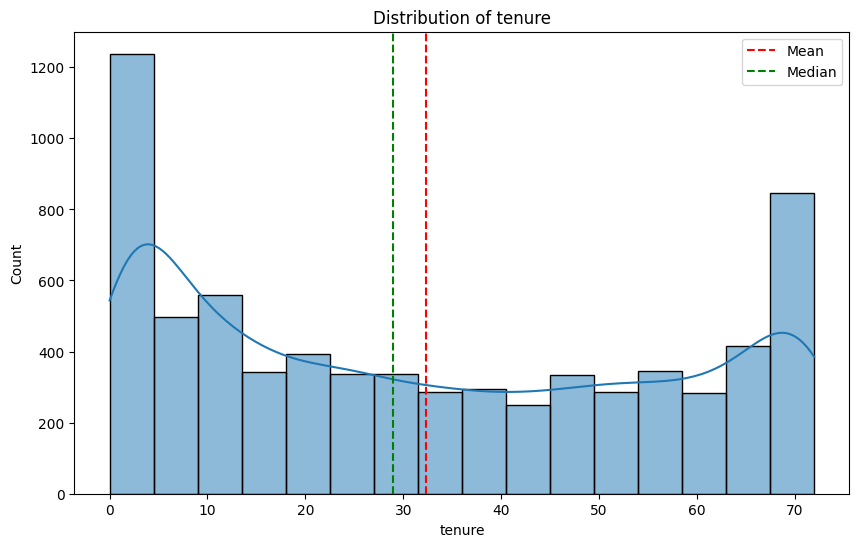

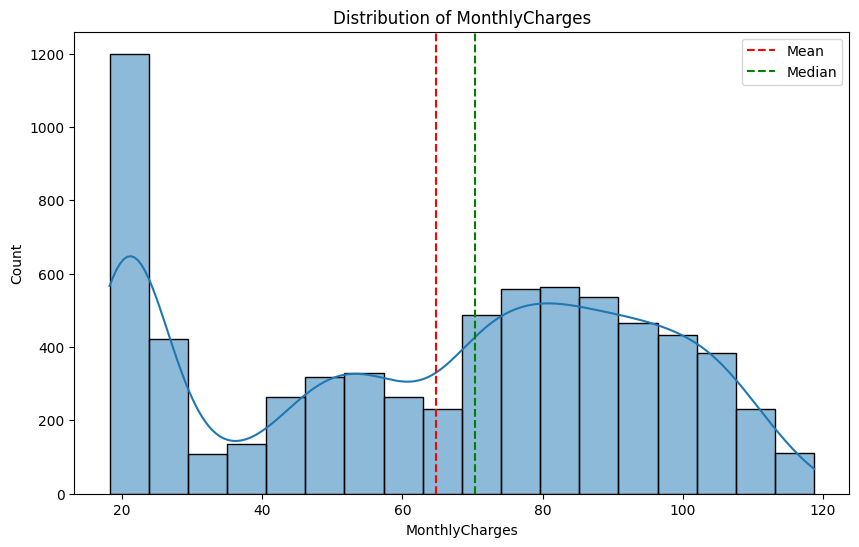

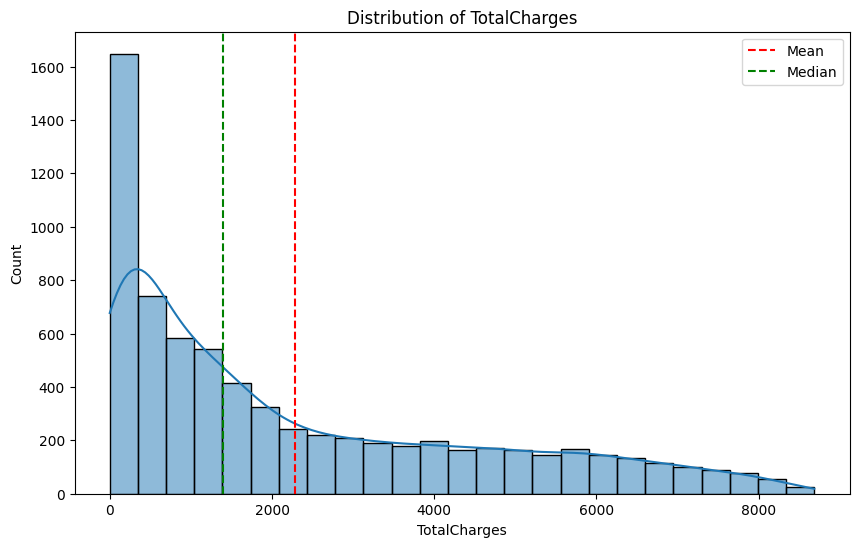

In [ ]:
column_numeric =['tenure','MonthlyCharges', 'TotalCharges']
for col in column_numeric:
  plot_hist(df,col)

tenure: not normally Distributed, slighlty skewwd on both side.

MonthlyCharges: not normally Distributed,

TotalCharges: not normally Distributed, its right Skewed. Might have outlier present.

you cannot work with data that is skewed "TotalCharges". so need to do feature Scaling. if building model using tree models then no need to feature scale.

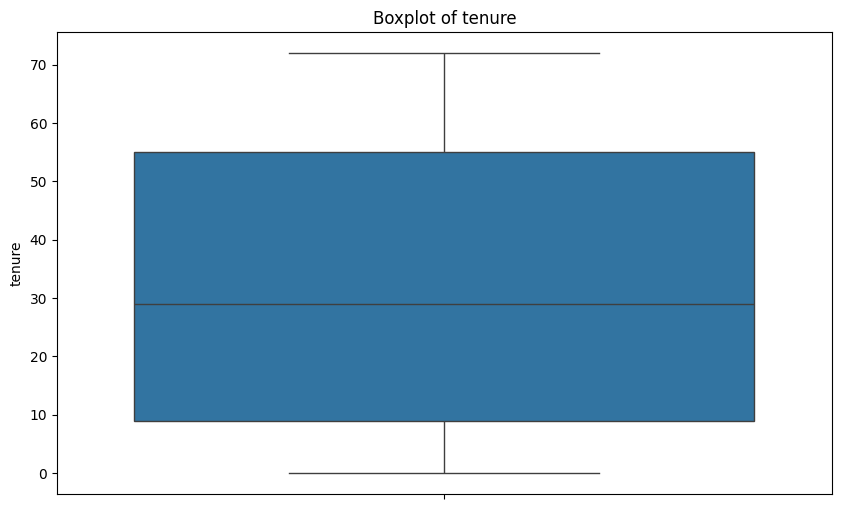

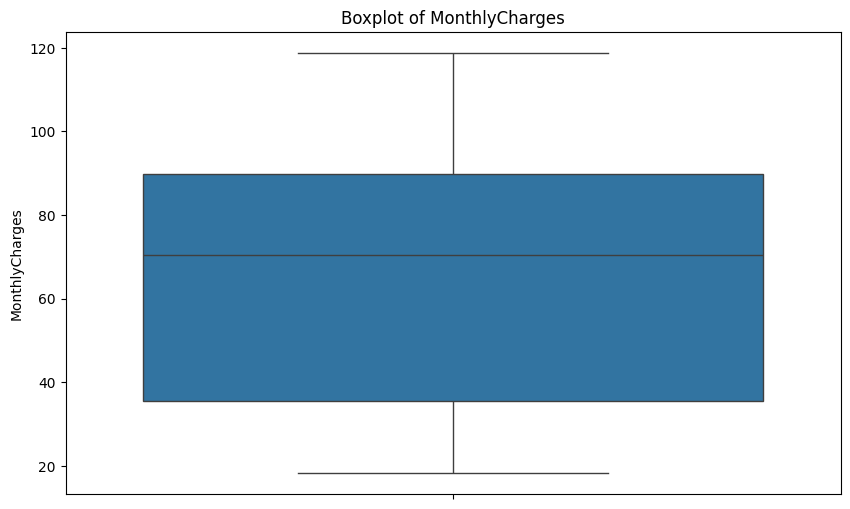

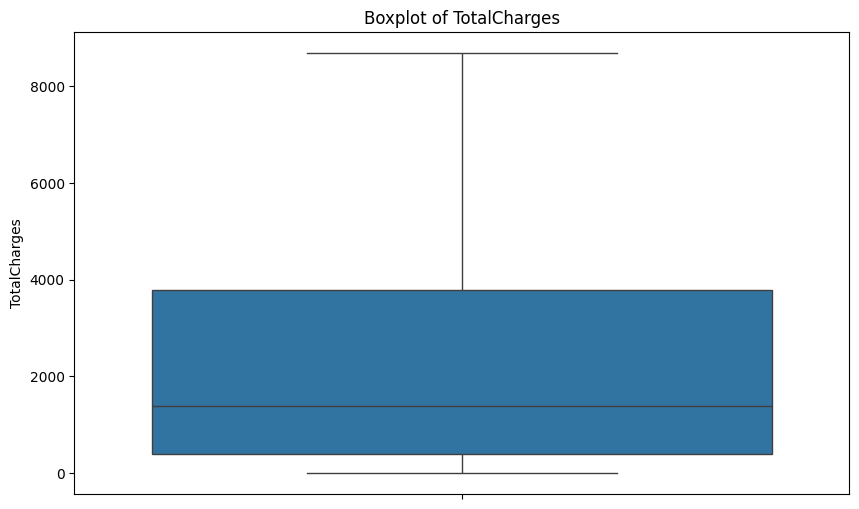

In [ ]:
def plot_box(df, col):
  plt.figure(figsize=(10, 6))
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

for col in column_numeric:
  plot_box(df, col)

In this case we do not have outlier for all three numerical column.

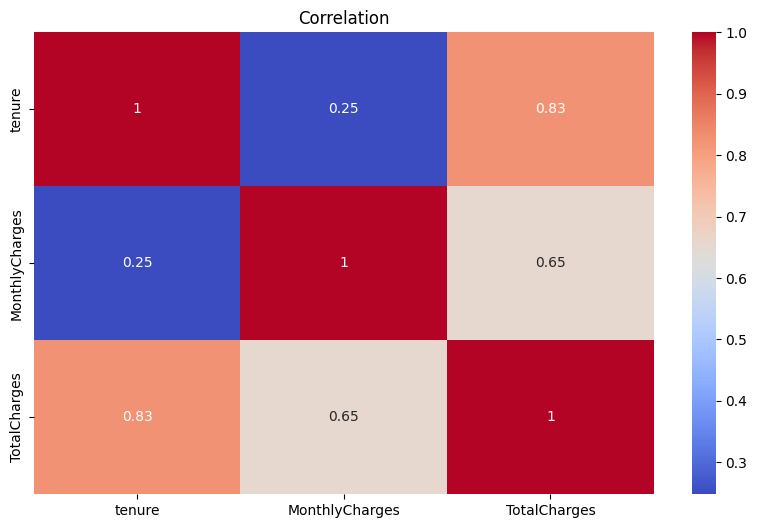

In [ ]:
# Correlation Matrix - Heatmaps
plt.figure(figsize=(10, 6))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation")
plt.show()

Here there are two cases, if you want you can remove Totalcharges or tenure, as they are correlated.

or else you can keep both. So during Model Building check by doing both cases.

select one with better.

In [ ]:
# Categorical features - Analysis
# let see distribution of categories in all columns

obj_col = df.select_dtypes(include = 'object').columns.to_list()
obj_col

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
# we need to include "SeniorCitizen" as its cateogrical
obj_col = ["SeniorCitizen"] + obj_col
obj_col.remove("customerID")
obj_col

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

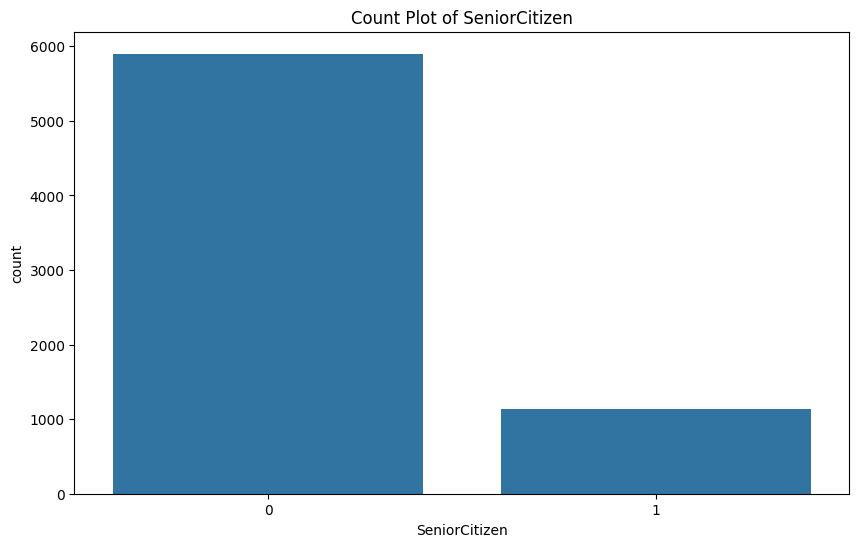

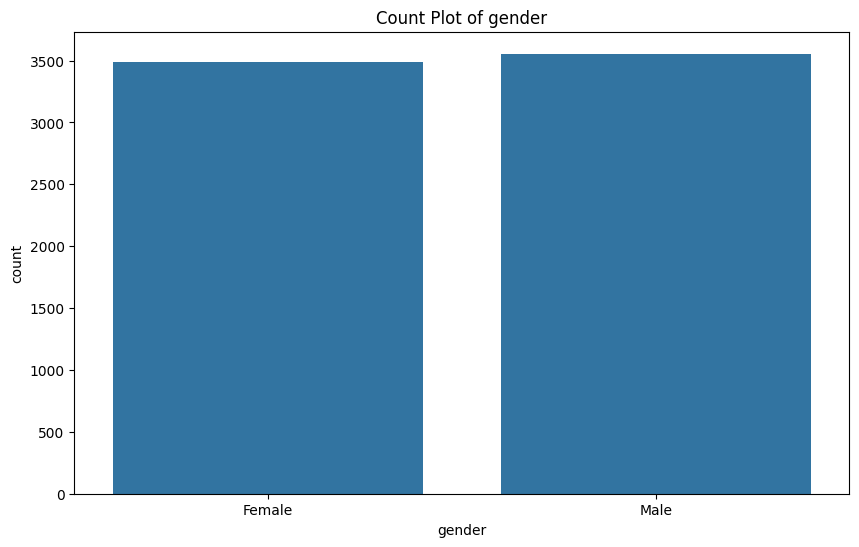

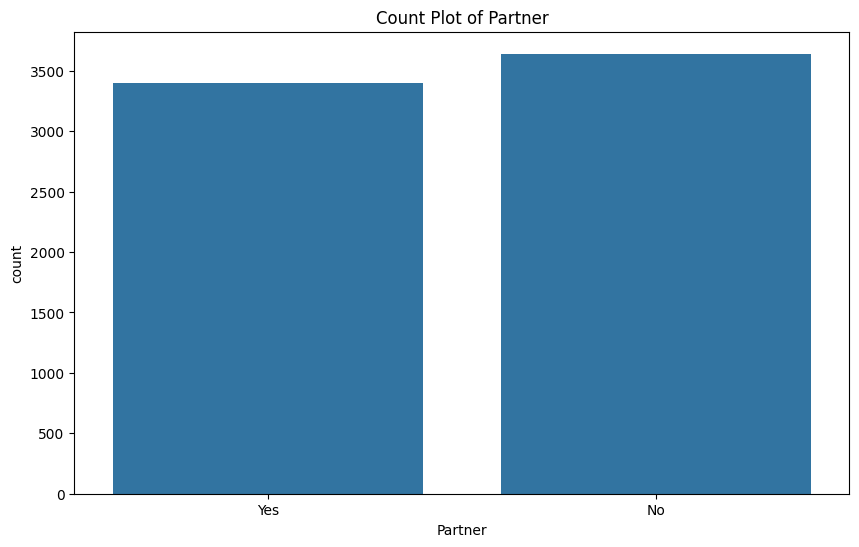

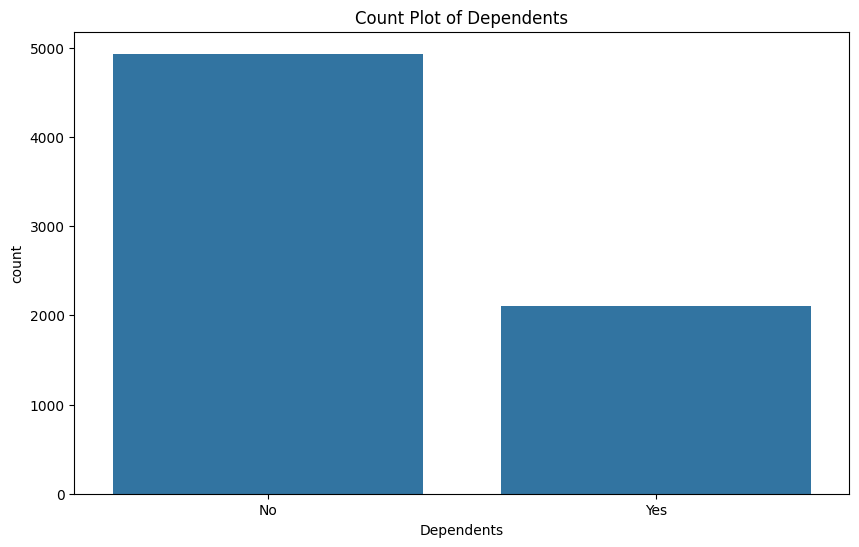

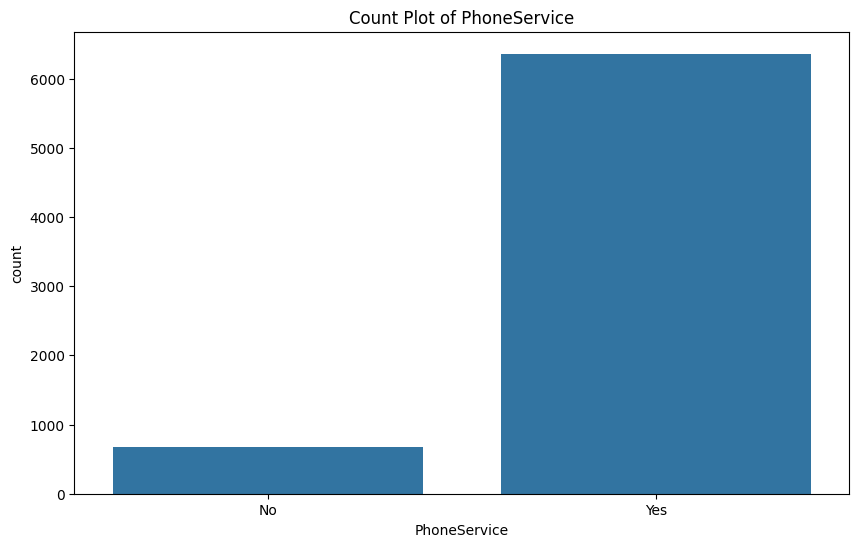

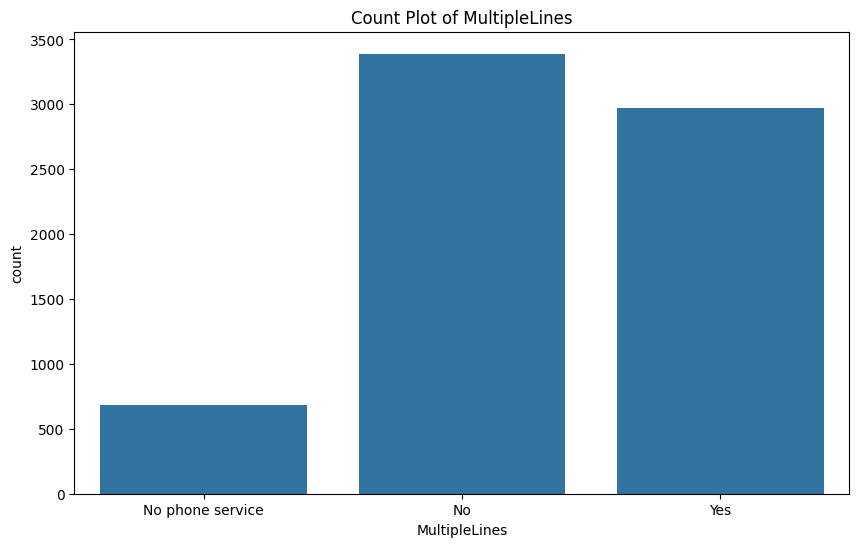

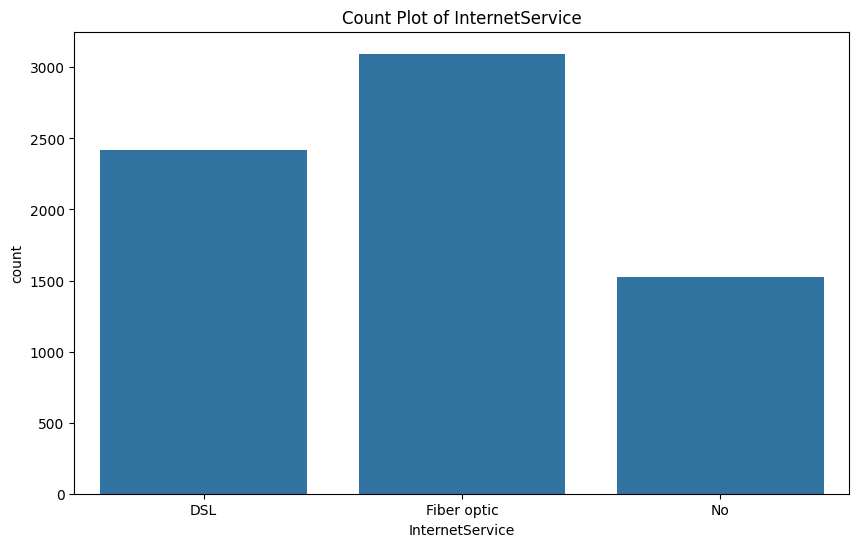

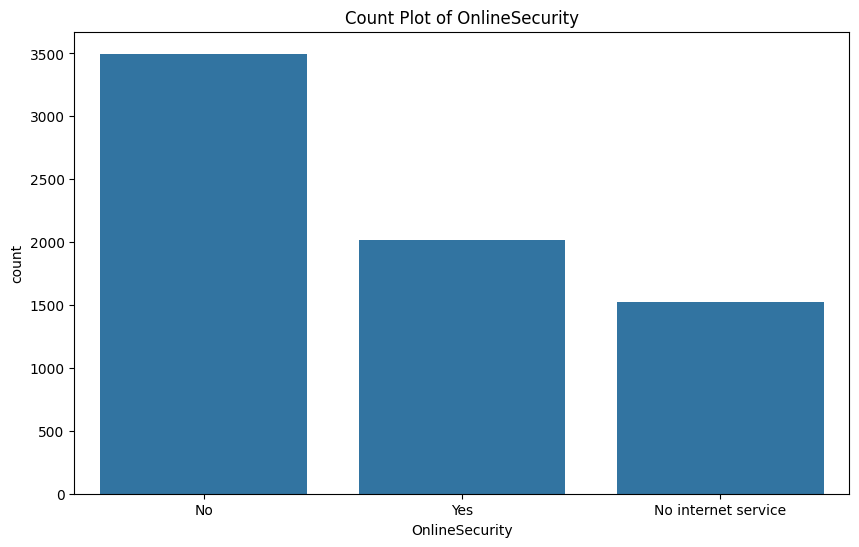

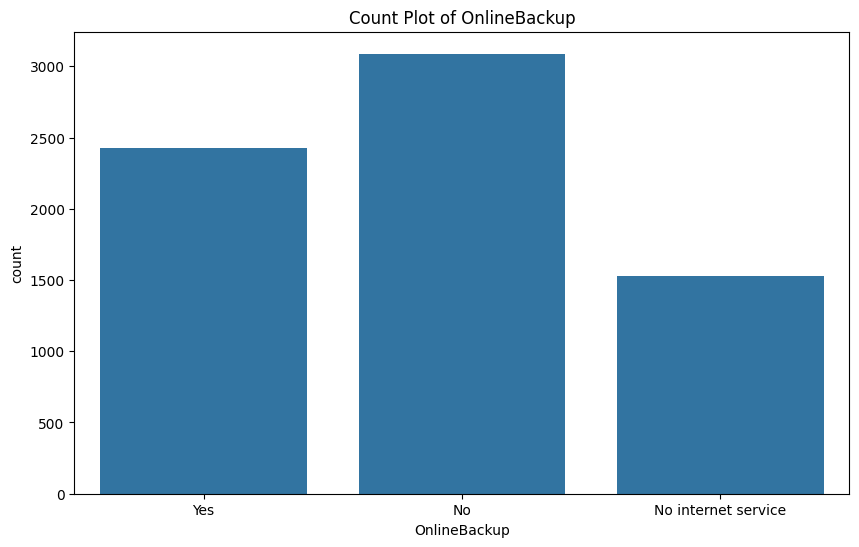

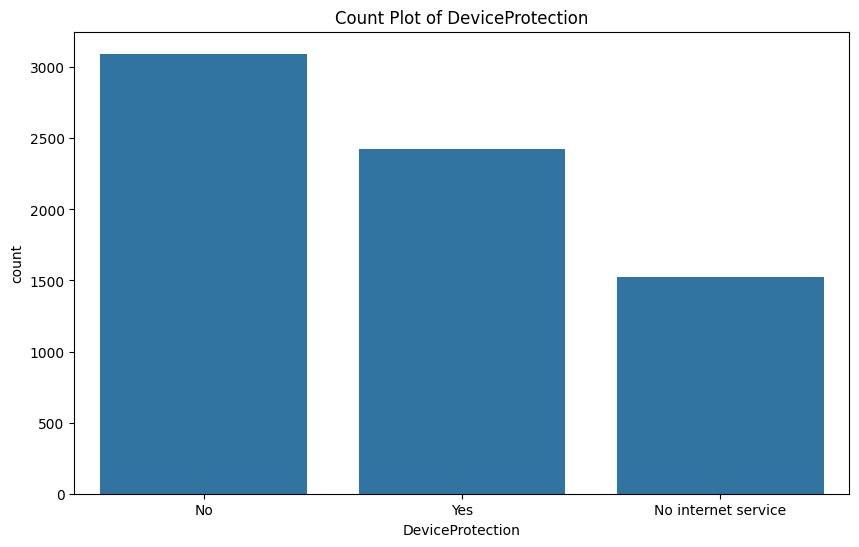

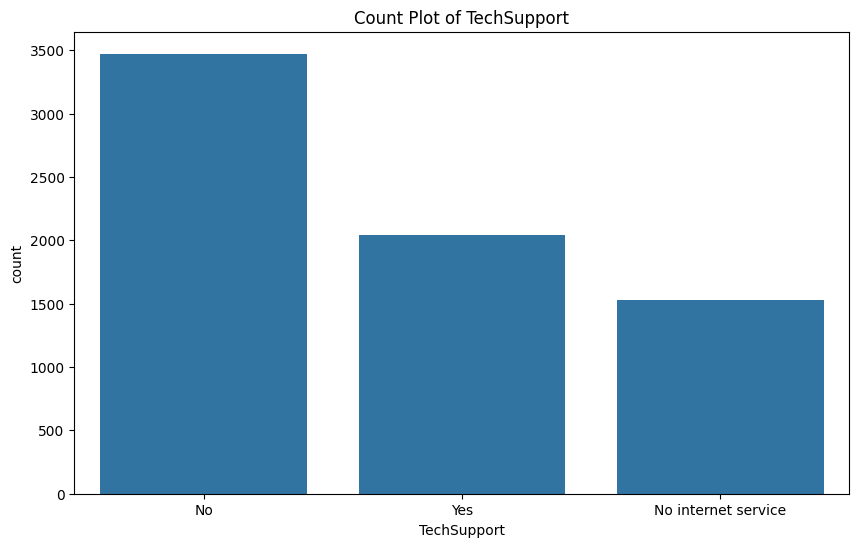

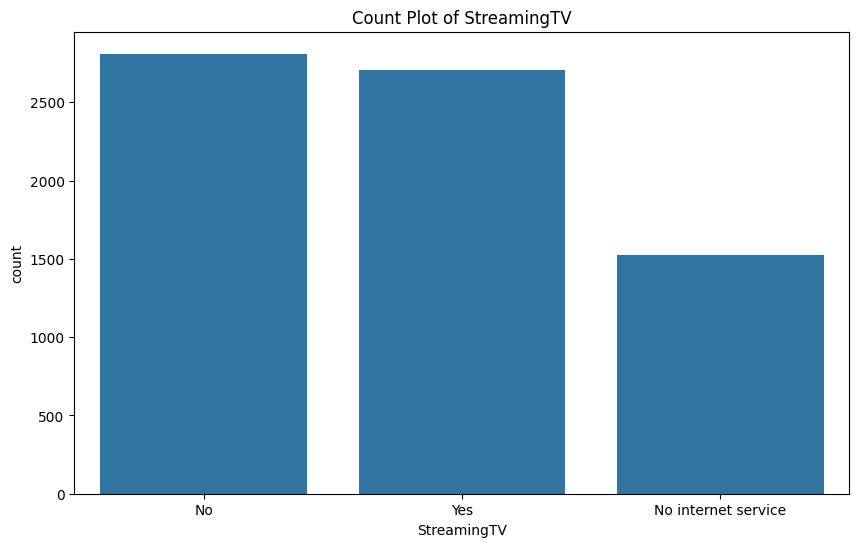

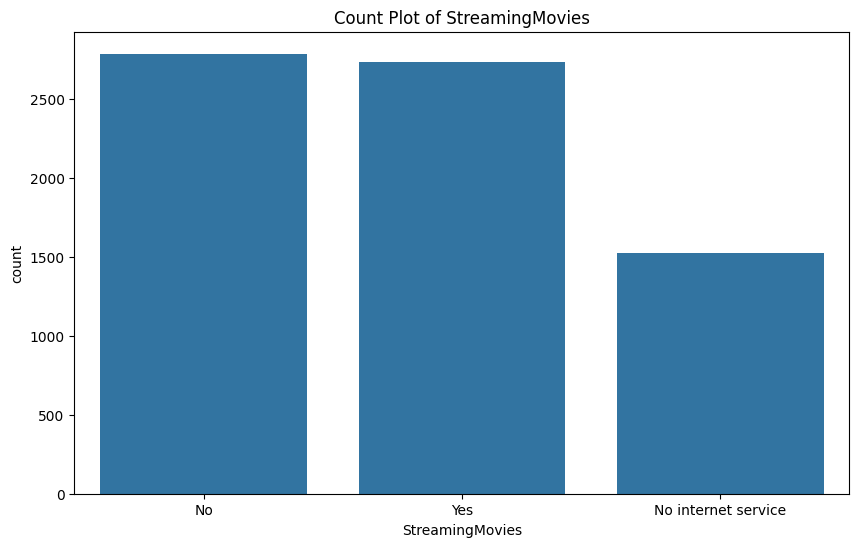

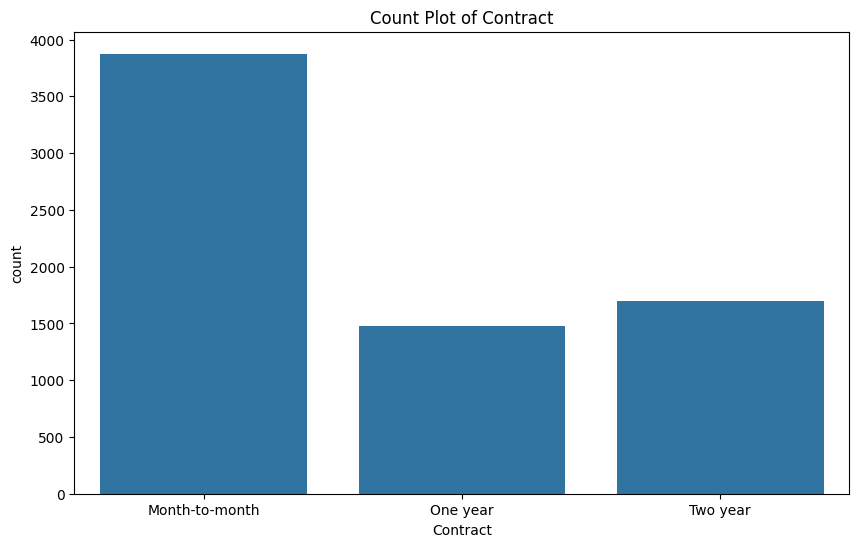

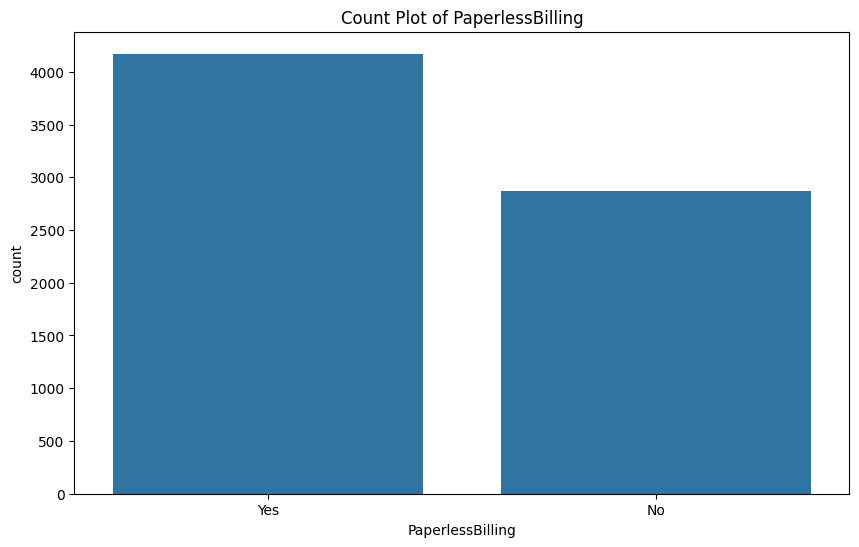

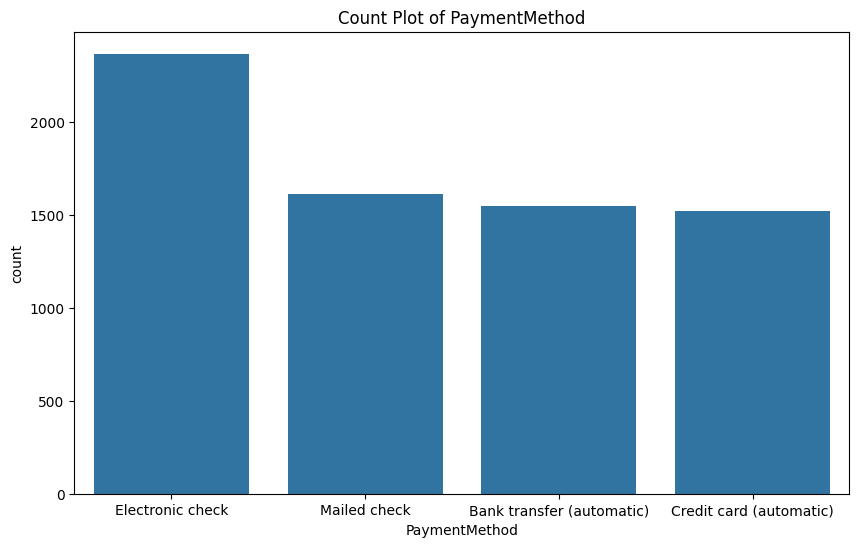

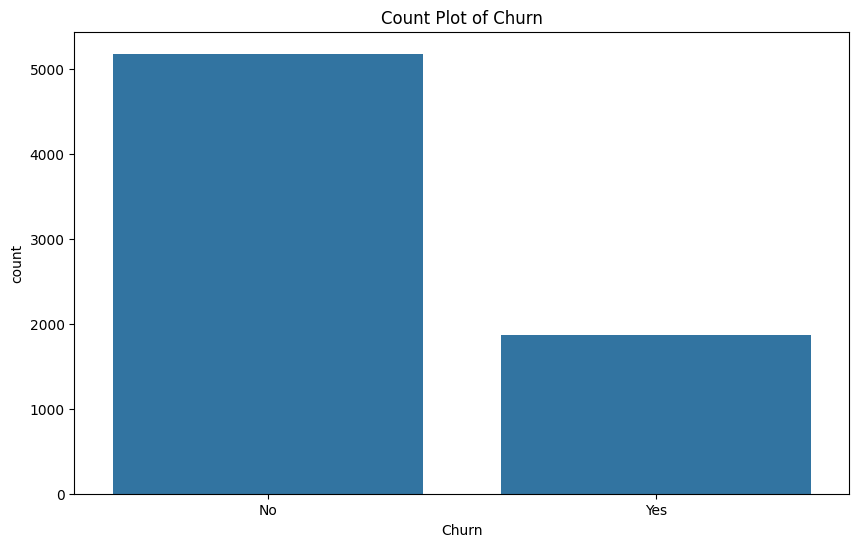

In [ ]:
# count plots
for col in obj_col:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

Most of Categorical Columns are imbalanced. ALso our target Column "Churn" is Imbalanced.

Again if using tree model, no necessary to focus on feature columns, but need to focus on target column.